# Connect G-Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
default_dir = "/content/drive/MyDrive/Colab Notebooks/DigitalSkola/Week 12/Project 6"
os.chdir(default_dir)

In [4]:
!ls

 diabetes.csv  '[Sandbox] Diabetes Prediction (Classification).ipynb'


# Import Libraries

In [5]:
import warnings
warnings.simplefilter(action="ignore")

import pandas as pd
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

from sklearn.preprocessing import RobustScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import (
    GradientBoostingClassifier,
    RandomForestClassifier
)

from sklearn.metrics import (
    accuracy_score,
    roc_auc_score,
    roc_curve,
    classification_report
)

from sklearn.model_selection import (
    KFold,
    train_test_split,
    GridSearchCV,
    cross_val_score
)

# 1.&nbsp;Load Dataset

In [7]:
df = pd.read_csv("diabetes.csv")

In [8]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,627.000,50,1
1,1,85,66,29,0,26.6,351.000,31,0
2,8,183,64,0,0,23.3,672.000,32,1
3,1,89,66,23,94,28.1,167.000,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## 1.1 Pima Indians Diabetes Database

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, **all patients here are females at least 21 years old of Pima Indian heritage**.

The datasets consists of several medical predictor variables and one target variable, **Outcome**. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

We build a **machine learning model** to accurately predict whether or not the patients in the dataset have **diabetes or not.**

- **Pregnancies**: Number of times pregnant
- **Glucose**: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- **BloodPressure**: Diastolic blood pressure (mm Hg)
- **SkinThickness**: Triceps skin fold thickness (mm)
- **Insulin**: 2-Hour serum insulin (mu U/ml)
- **BMI**: Body mass index (weight in kg/(height in m)^2)
- **DiabetesPedigreeFunction**: Diabetes pedigree function
- **Age**: Age (years)
- **Outcome**: Class variable (0 or 1) 268 of 768 are 1, the others are 0

## 1.2 General Information on Variables

### a. Glucose Tolerance Test
It is a blood test that involves taking multiple blood samples over time, usually 2 hours.It used to diagnose diabetes. The results can be classified as normal, impaired, or abnormal.
* **Normal Results for Diabetes ->** Two-hour glucose level less than 140 mg/dL

* **Impaired Results for Diabetes ->** Two-hour glucose level 140 to 200 mg/dL

* **Abnormal (Diagnostic) Results for Diabetes ->** Two-hour glucose level greater than 200 mg/dL



### b. BloodPressure
The diastolic reading, or the bottom number, is the pressure in the arteries when the heart rests between beats. This is the time when the heart fills with blood and gets oxygen. A normal diastolic blood pressure is lower than 80. A reading of 90 or higher means you have high blood pressure.

* **Normal**: Systolic below 120 and diastolic below 80
* **Elevated**: Systolic 120–129 and diastolic under 80
* **Hypertension stage 1**: Systolic 130–139 and diastolic 80–89
* **Hypertension stage 2**: Systolic 140-plus and diastolic 90 or more
* **Hypertensive crisis**: Systolic higher than 180 and diastolic above 120.

### c. BMI

The standard weight status categories associated with BMI ranges for adults are shown in the following table.

* Below 18.5 -> **Underweight**
* 18.5 – 24.9 -> **Normal or Healthy Weight**
* 25.0 – 29.9 -> **Overweight**
* 30.0 and Above -> **Obese**

### d. Triceps Skinfolds
For adults, the standard normal values for triceps skinfolds are:
* 18.0mm (women)

# 2.&nbsp;Exploratory Data Analysis

In [9]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,627.000,50,1
1,1,85,66,29,0,26.6,351.000,31,0
2,8,183,64,0,0,23.3,672.000,32,1
3,1,89,66,23,94,28.1,167.000,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,171.00,63,0
764,2,122,70,27,0,36.8,0.34,27,0
765,5,121,72,23,112,26.2,245.00,30,0
766,1,126,60,0,0,30.1,349.00,47,1
767,1,93,70,31,0,30.4,315.00,23,0


In [11]:
df.shape

(768, 9)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [13]:
# Getting various summary statistics
# There is notably a large difference between 99% and max values of predictors “Insulin”,”SkinThickness”,”DiabetesPedigreeFunction”
# There are extreme values-Outliers in our data set

# See BMI Min: 0
df.describe(
    percentiles=[0.05, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99]).T

,count,mean,std,min,5%,25%,50%,75%,90%,95%,99%,max
Pregnancies,768.0,3.845052,3.369578,0.0,0.00,1.0,3.0,6.00,9.0,10.000,13.000,17.0
Glucose,768.0,120.894531,31.972618,0.0,79.00,99.0,117.0,140.25,167.0,181.000,196.000,199.0
BloodPressure,768.0,69.105469,19.355807,0.0,38.70,62.0,72.0,80.00,88.0,90.000,106.000,122.0
SkinThickness,768.0,20.536458,15.952218,0.0,0.00,0.0,23.0,32.00,40.0,44.000,51.330,99.0
Insulin,768.0,79.799479,115.244002,0.0,0.00,0.0,30.5,127.25,210.0,293.000,519.900,846.0
BMI,768.0,31.992578,7.884160,0.0,21.80,27.3,32.0,36.60,41.5,44.395,50.759,67.1
DiabetesPedigreeFunction,768.0,347.079349,254.431659,0.1,0.34,165.0,295.5,527.25,722.9,827.300,950.980,997.0
Age,768.0,33.240885,11.760232,21.0,21.00,24.0,29.0,41.00,51.0,58.000,67.000,81.0
Outcome,768.0,0.348958,0.476951,0.0,0.00,0.0,0.0,1.00,1.0,1.000,1.000,1.0


In [14]:
# Target variable categorical
df.Outcome.unique()

array([1, 0])

In [15]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

# 3.&nbsp;Data Visualization

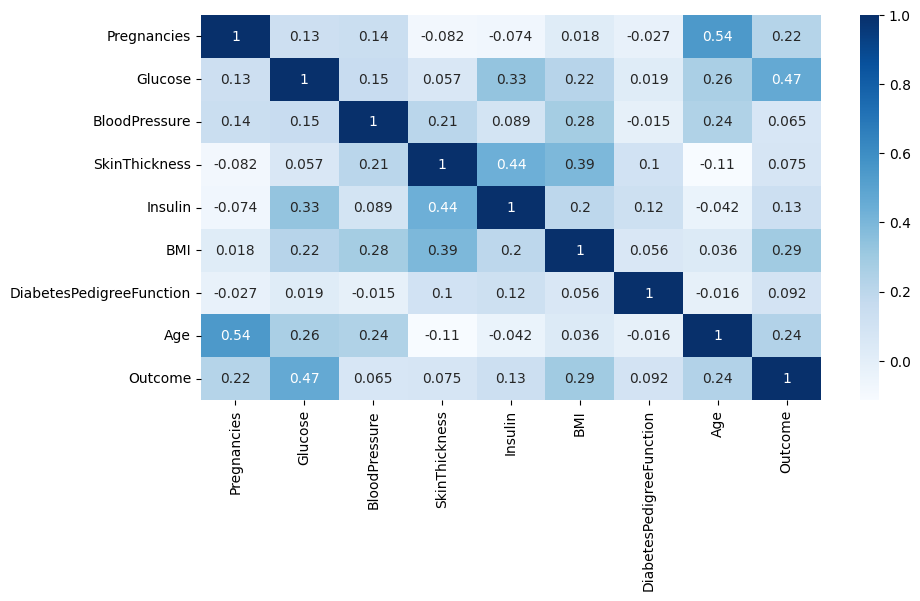

In [16]:
plt.figure(figsize=(10, 5))

sns.heatmap(
    df.corr(),
    cmap='Blues',
    annot=True
);

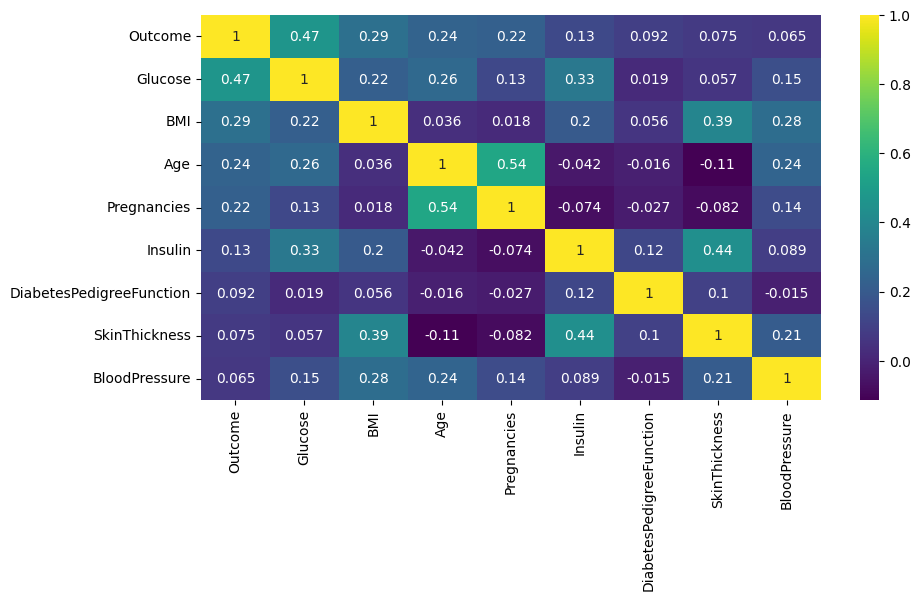

In [17]:
# Outcome correlation matrix

k = 9 # number of variables for heatmap
cols = df.corr().nlargest(k, 'Outcome')['Outcome'].index
cm = df[cols].corr()
plt.figure(figsize=(10, 5))
sns.heatmap(
    cm,
    annot=True,
    cmap = 'viridis');

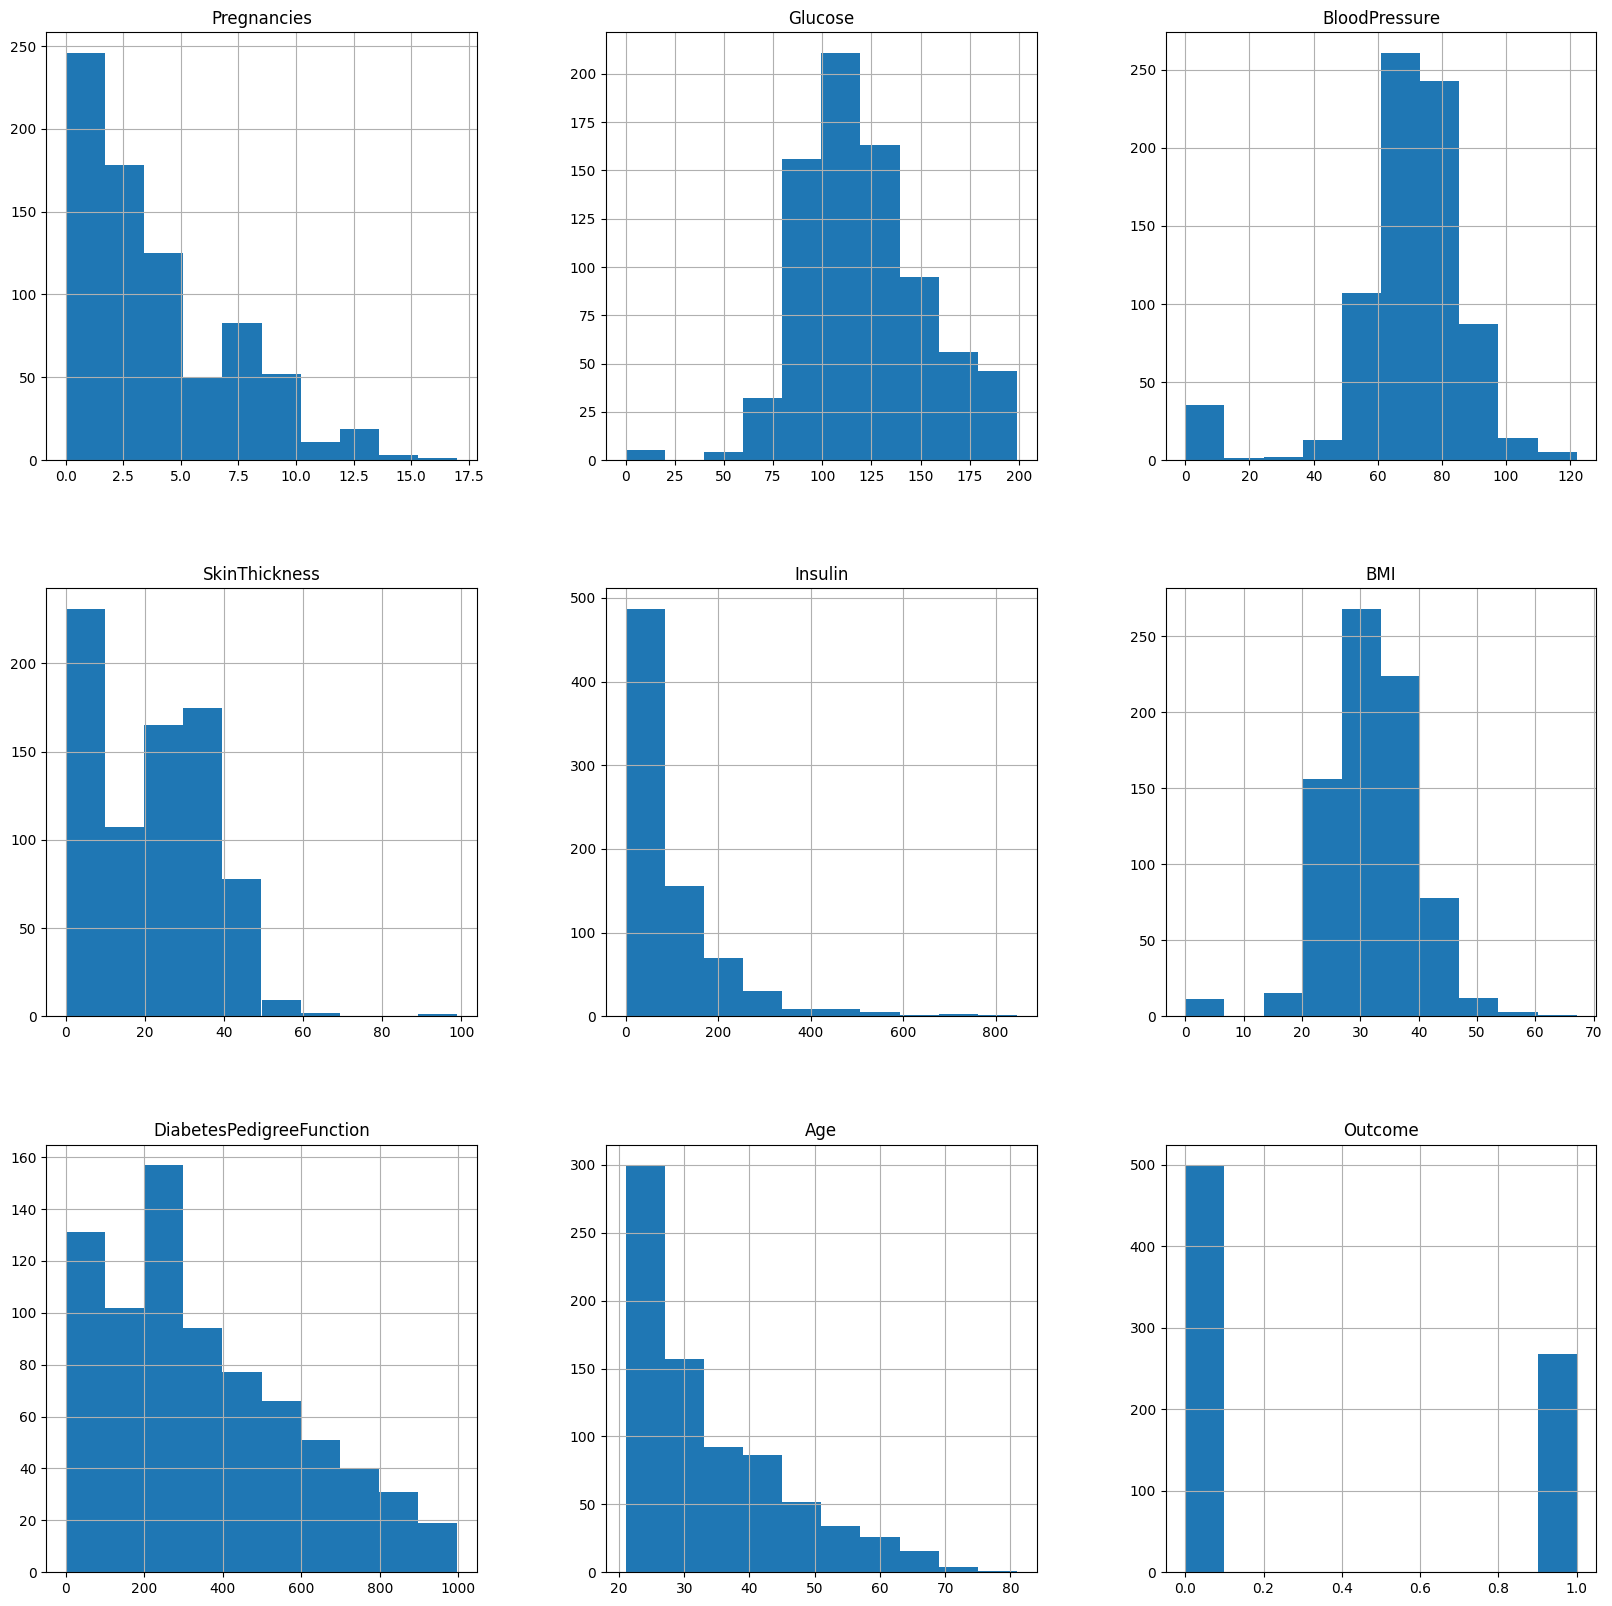

In [18]:
# see how the data is distributed.
df.hist(figsize = (20,20));

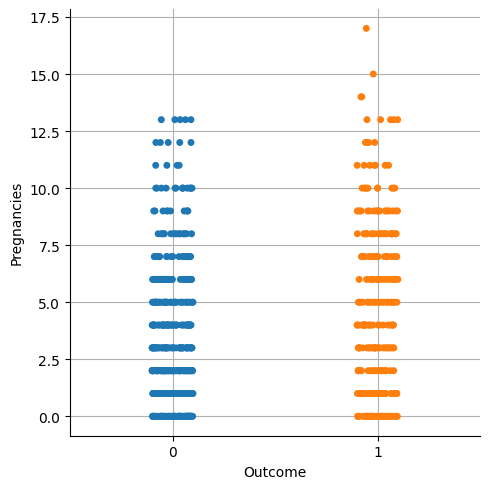

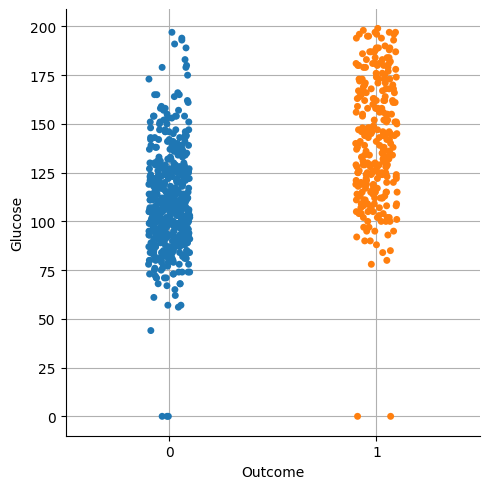

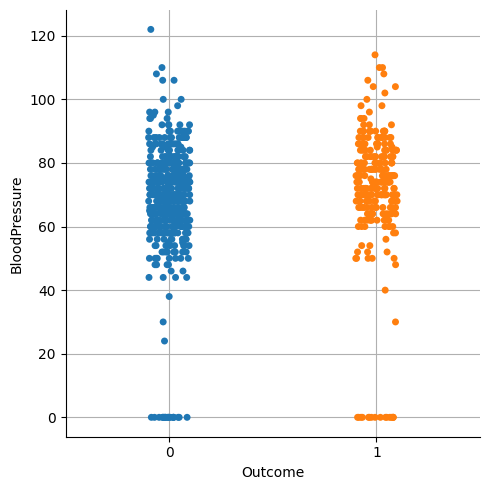

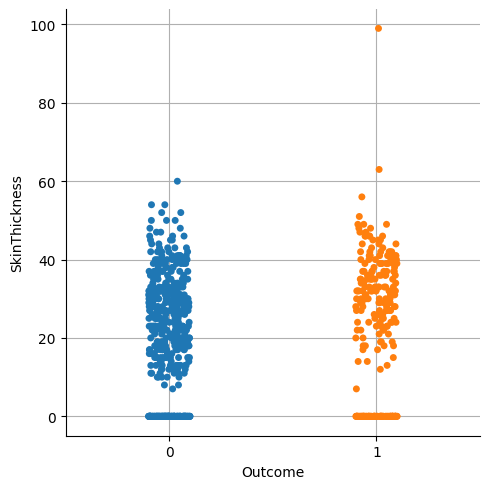

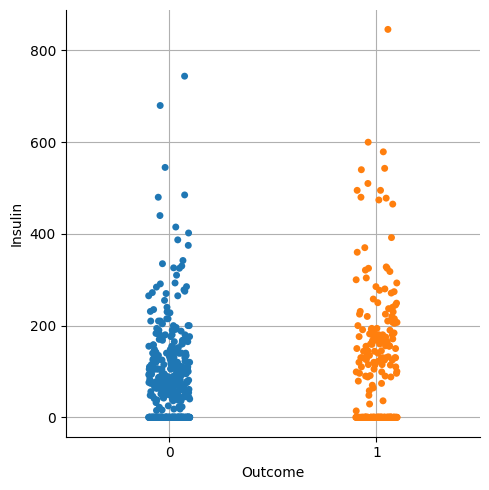

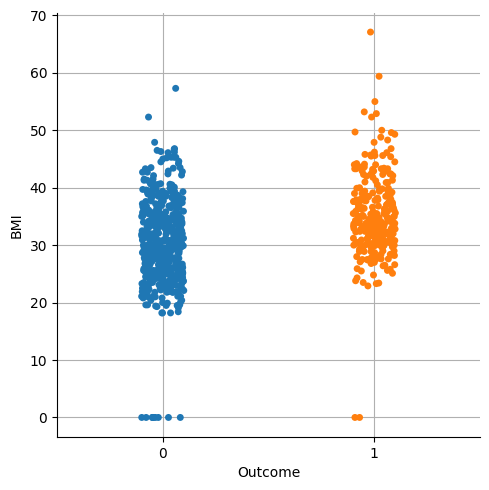

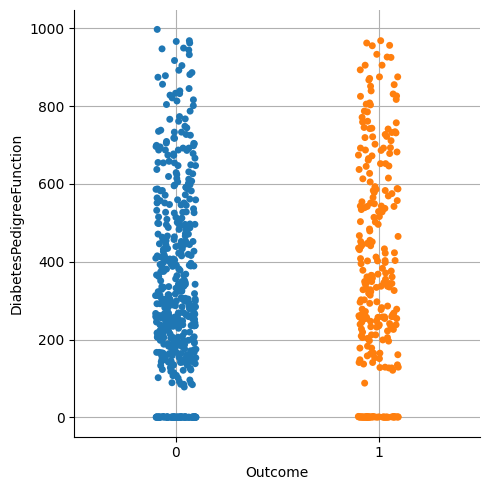

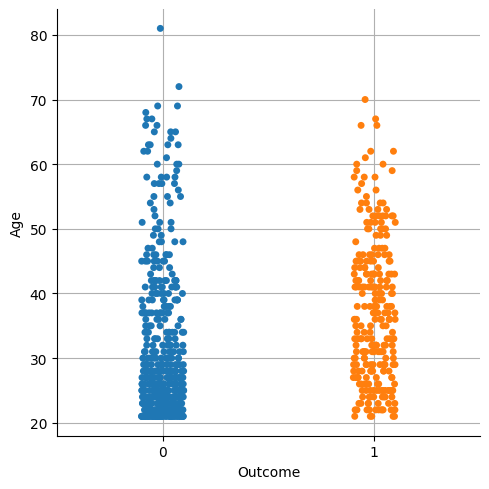

In [19]:
for col in df.columns:
    if col != "Outcome":
        sns.catplot(
            x="Outcome",
            y=col,
            hue="Outcome",
            data=df
        )
        plt.grid()

# 4.&nbsp;Data Preprocessing

In [20]:
#Observation units for variables with a minimum value of zero are NaN, except for the pregnancy variable.
df.describe(
    percentiles=[0.05, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99]
).T

,count,mean,std,min,5%,25%,50%,75%,90%,95%,99%,max
Pregnancies,768.0,3.845052,3.369578,0.0,0.00,1.0,3.0,6.00,9.0,10.000,13.000,17.0
Glucose,768.0,120.894531,31.972618,0.0,79.00,99.0,117.0,140.25,167.0,181.000,196.000,199.0
BloodPressure,768.0,69.105469,19.355807,0.0,38.70,62.0,72.0,80.00,88.0,90.000,106.000,122.0
SkinThickness,768.0,20.536458,15.952218,0.0,0.00,0.0,23.0,32.00,40.0,44.000,51.330,99.0
Insulin,768.0,79.799479,115.244002,0.0,0.00,0.0,30.5,127.25,210.0,293.000,519.900,846.0
BMI,768.0,31.992578,7.884160,0.0,21.80,27.3,32.0,36.60,41.5,44.395,50.759,67.1
DiabetesPedigreeFunction,768.0,347.079349,254.431659,0.1,0.34,165.0,295.5,527.25,722.9,827.300,950.980,997.0
Age,768.0,33.240885,11.760232,21.0,21.00,24.0,29.0,41.00,51.0,58.000,67.000,81.0
Outcome,768.0,0.348958,0.476951,0.0,0.00,0.0,0.0,1.00,1.0,1.000,1.000,1.0


In [21]:
# NaN values of 0 for Glucose, Blood Pressure, Skin Thickness, Insulin, BMI
# We can write Nan instead of 0

cols = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
for col in cols:
    df[col].replace(0, np.NaN, inplace=True)

In [22]:
# now we can see missing values
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [23]:
# We can fill in NaN values with a median according to the target

for col in df.columns:
    df.loc[(df["Outcome"]==0) & (df[col].isnull()), col] = df[df["Outcome"]==0][col].median()
    df.loc[(df["Outcome"]==1) & (df[col].isnull()), col] = df[df["Outcome"]==1][col].median()

In [24]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [25]:
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.10)
    quartile3 = dataframe[variable].quantile(0.90)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [26]:
def has_outliers(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    if dataframe[(dataframe[variable] < low_limit) | (dataframe[variable] > up_limit)].any(axis=None):
        print(variable, "yes")

In [27]:
for col in df.columns:
    has_outliers(df, col)

SkinThickness yes
Insulin yes


In [28]:
def replace_with_thresholds(dataframe, numeric_columns):
    for variable in numeric_columns:
        low_limit, up_limit = outlier_thresholds(dataframe, variable)
        dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
        dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [29]:
replace_with_thresholds(df, df.columns)

In [30]:
for col in df.columns:
    has_outliers(df, col)

In [31]:
df.describe(
    percentiles=[0.05,0.25,0.50,0.75,0.90,0.95,0.99]
).T

,count,mean,std,min,5%,25%,50%,75%,90%,95%,99%,max
Pregnancies,768.0,3.845052,3.369578,0.0,0.000,1.00,3.00,6.00,9.0,10.000,13.000,17.0
Glucose,768.0,121.677083,30.464161,44.0,80.000,99.75,117.00,140.25,167.0,181.000,196.000,199.0
BloodPressure,768.0,72.389323,12.106039,24.0,52.000,64.00,72.00,80.00,88.0,90.000,106.000,122.0
SkinThickness,768.0,29.055990,8.671056,7.0,14.350,25.00,28.00,32.00,40.0,44.000,51.330,73.0
Insulin,768.0,138.839844,75.233052,14.0,50.000,102.50,102.50,169.50,210.0,293.000,424.500,424.5
BMI,768.0,32.434635,6.880498,18.2,22.235,27.50,32.05,36.60,41.5,44.395,50.759,67.1
DiabetesPedigreeFunction,768.0,347.079349,254.431659,0.1,0.340,165.00,295.50,527.25,722.9,827.300,950.980,997.0
Age,768.0,33.240885,11.760232,21.0,21.000,24.00,29.00,41.00,51.0,58.000,67.000,81.0
Outcome,768.0,0.348958,0.476951,0.0,0.000,0.00,0.00,1.00,1.0,1.000,1.000,1.0


# 5.&nbsp;Feature Engineering

In [32]:
df['New_Glucose_Class'] = pd.cut(
    x=df['Glucose'],
    bins=[0, 139, 200],
    labels=["Normal", "Prediabetes"]
)

In [33]:
df['New_Glucose_Class'].value_counts()

Normal         569
Prediabetes    199
Name: New_Glucose_Class, dtype: int64

In [35]:
df['New_Glucose_Class'].value_counts(normalize=True)

Normal         0.740885
Prediabetes    0.259115
Name: New_Glucose_Class, dtype: float64

In [36]:
df['New_BMI_Range'] = pd.cut(
    x=df['BMI'],
    bins=[0, 18.5, 24.9, 29.9, 100],
    labels=["Underweight", "Healthy", "Overweight", "Obese"]
)

In [37]:
df['New_BloodPressure'] = pd.cut(
    x=df['BloodPressure'],
    bins=[0, 79, 89, 123],
    labels=["Normal", "HS1", "HS2"]
)

In [38]:
df['New_SkinThickness'] = df['SkinThickness'].apply(lambda x: 1 if x <= 18.0 else 0)

In [39]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,New_Glucose_Class,New_BMI_Range,New_BloodPressure,New_SkinThickness
0,6.0,148.0,72.0,35.0,169.5,33.6,627.000,50.0,1.0,Prediabetes,Obese,Normal,0
1,1.0,85.0,66.0,29.0,102.5,26.6,351.000,31.0,0.0,Normal,Overweight,Normal,0
2,8.0,183.0,64.0,32.0,169.5,23.3,672.000,32.0,1.0,Prediabetes,Healthy,Normal,0
3,1.0,89.0,66.0,23.0,94.0,28.1,167.000,21.0,0.0,Normal,Overweight,Normal,0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0,Normal,Obese,Normal,0


In [40]:
def one_hot_encoder(dataframe, categorical_columns, nan_as_category=False):
    original_columns = list(dataframe.columns)
    dataframe = pd.get_dummies(
        dataframe,
        columns=categorical_columns,
        dummy_na=nan_as_category,
        drop_first=True
    )
    new_columns = [col for col in dataframe.columns if col not in original_columns]
    return dataframe, new_columns

In [41]:
categorical_columns = [col for col in df.columns if len(df[col].unique()) <= 10 and col != "Outcome"]
categorical_columns

['New_Glucose_Class',
 'New_BMI_Range',
 'New_BloodPressure',
 'New_SkinThickness']

In [42]:
df, new_cols_ohe = one_hot_encoder(df,categorical_columns)
new_cols_ohe

['New_Glucose_Class_Prediabetes',
 'New_BMI_Range_Healthy',
 'New_BMI_Range_Overweight',
 'New_BMI_Range_Obese',
 'New_BloodPressure_HS1',
 'New_BloodPressure_HS2',
 'New_SkinThickness_1']

In [43]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,New_Glucose_Class_Prediabetes,New_BMI_Range_Healthy,New_BMI_Range_Overweight,New_BMI_Range_Obese,New_BloodPressure_HS1,New_BloodPressure_HS2,New_SkinThickness_1
0,6.0,148.0,72.0,35.0,169.5,33.6,627.000,50.0,1.0,1,0,0,1,0,0,0
1,1.0,85.0,66.0,29.0,102.5,26.6,351.000,31.0,0.0,0,0,1,0,0,0,0
2,8.0,183.0,64.0,32.0,169.5,23.3,672.000,32.0,1.0,1,1,0,0,0,0,0
3,1.0,89.0,66.0,23.0,94.0,28.1,167.000,21.0,0.0,0,0,1,0,0,0,0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0,0,0,0,1,0,0,0


In [44]:
num_feats = [col for col in df.columns if df[col].dtypes != 'O' and len(df[col].value_counts()) < 10]
no_need_to_scaled = new_cols_ohe + ["Outcome"] + num_feats
cols_need_scale = [col for col in df.columns if col not in no_need_to_scaled]

print("List of columns that need to be scaled:", cols_need_scale)
rs = RobustScaler()
df.loc[:, cols_need_scale] = rs.fit_transform(df[cols_need_scale])
print("Feature Scaling, Done!")

List of columns that need to be scaled: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
Feature Scaling, Done!


In [45]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,New_Glucose_Class_Prediabetes,New_BMI_Range_Healthy,New_BMI_Range_Overweight,New_BMI_Range_Obese,New_BloodPressure_HS1,New_BloodPressure_HS2,New_SkinThickness_1
0,0.6,0.765432,0.000,1.000000,1.000000,0.170330,0.915114,1.235294,1.0,1,0,0,1,0,0,0
1,-0.4,-0.790123,-0.375,0.142857,0.000000,-0.598901,0.153209,0.117647,0.0,0,0,1,0,0,0,0
2,1.0,1.629630,-0.500,0.571429,1.000000,-0.961538,1.039337,0.176471,1.0,1,1,0,0,0,0,0
3,-0.4,-0.691358,-0.375,-0.714286,-0.126866,-0.434066,-0.354727,-0.470588,0.0,0,0,1,0,0,0,0
4,-0.6,0.493827,-2.000,1.000000,0.977612,1.214286,-0.809419,0.235294,1.0,0,0,0,1,0,0,0


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Pregnancies                    768 non-null    float64
 1   Glucose                        768 non-null    float64
 2   BloodPressure                  768 non-null    float64
 3   SkinThickness                  768 non-null    float64
 4   Insulin                        768 non-null    float64
 5   BMI                            768 non-null    float64
 6   DiabetesPedigreeFunction       768 non-null    float64
 7   Age                            768 non-null    float64
 8   Outcome                        768 non-null    float64
 9   New_Glucose_Class_Prediabetes  768 non-null    uint8  
 10  New_BMI_Range_Healthy          768 non-null    uint8  
 11  New_BMI_Range_Overweight       768 non-null    uint8  
 12  New_BMI_Range_Obese            768 non-null    uin

# 6.&nbsp;Modeling

In [47]:
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

In [49]:
models = [
    ('LR', LogisticRegression()),
    ('KNN', KNeighborsClassifier()),
    ('CART', DecisionTreeClassifier()),
    ('RF', RandomForestClassifier()),
    ('SVR', SVC(gamma='auto')),
    ('XGBM', XGBClassifier()),
    ('GB',GradientBoostingClassifier()),
    ("LightGBM", LGBMClassifier())
]

# evaluate each model in turn
results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=3, shuffle=True, random_state=42)
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring="accuracy")
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.770833 (0.015073)
KNN: 0.825521 (0.015073)
CART: 0.843750 (0.012758)
RF: 0.876302 (0.023939)
SVR: 0.845052 (0.016367)
XGBM: 0.873698 (0.017566)
GB: 0.888021 (0.016053)
LightGBM: 0.877604 (0.019225)


## 6.1 Model Hyper-Parameter Tuning

In [50]:
# Let's choose the highest 4 models
# GBM
gbm_model = GradientBoostingClassifier()

# Model Tuning
gbm_params = {
    "learning_rate": [0.01, 0.1, 0.001],
    "max_depth": [3, 5, 8],
    "n_estimators": [200, 500, 1000],
    "subsample": [1, 0.5, 0.8]
}

gbm_cv_model = GridSearchCV(
    gbm_model,
    gbm_params,
    cv=3,
    n_jobs=-1,
    verbose=2).fit(X, y)

gbm_cv_model.best_params_

# Final Model
gbm_tuned = GradientBoostingClassifier(**gbm_cv_model.best_params_).fit(X,y)

Fitting 3 folds for each of 81 candidates, totalling 243 fits


In [51]:
# LightGBM:
lgb_model = LGBMClassifier()

# Model Tuning
lgbm_params = {
    "learning_rate": [0.01, 0.5, 1],
    "n_estimators": [200, 500, 1000],
    "max_depth": [6, 8, 10],
    "colsample_bytree": [1, 0.5, 0.4]
}

lgbm_cv_model = GridSearchCV(
    lgb_model,
    lgbm_params,
    cv=3,
    n_jobs=-1,
    verbose=2).fit(X, y)

lgbm_cv_model.best_params_

# Final Model
lgbm_tuned = LGBMClassifier(**lgbm_cv_model.best_params_).fit(X, y)

Fitting 3 folds for each of 81 candidates, totalling 243 fits


In [52]:
# Random Forests:
rf_model = RandomForestClassifier()

# Model Tuning
rf_params = {
    "n_estimators" :[200, 500, 1000],
    "max_features": [3, 5, 7],
    "min_samples_split": [2, 5, 10],
    "max_depth": [5, 8, None]
}

rf_cv_model = GridSearchCV(
    rf_model,
    rf_params,
    cv=3,
    n_jobs=-1,
    verbose=2).fit(X, y)

rf_cv_model.best_params_

# Final Model
rf_tuned = RandomForestClassifier(**rf_cv_model.best_params_).fit(X, y)

Fitting 3 folds for each of 81 candidates, totalling 243 fits


In [53]:
# XGB
xgb_model = XGBClassifier()

# Model Tuning
xgb_params = {
    "learning_rate": [0.01, 0.1, 0.2, 1],
    "min_samples_split": np.linspace(0.1, 0.5, 10),
    "max_depth":[3,5,8],
    "subsample":[0.5, 0.9, 1.0],
    "n_estimators": [100, 1000]
}

xgb_cv_model = GridSearchCV(
    xgb_model,
    xgb_params,
    cv=3,
    n_jobs=-1,
    verbose=2).fit(X,y)

xgb_cv_model.best_params_

xgb_tuned = XGBClassifier(**xgb_cv_model.best_params_).fit(X,y)

Fitting 3 folds for each of 720 candidates, totalling 2160 fits
[14:03:46] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[14:03:46] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.



In [54]:
# evaluate each model in turn
models = [
    ('RF', rf_tuned),
    ('GBM',gbm_tuned ),
    ("LightGBM", lgbm_tuned),
    ("XGB",xgb_tuned)
]

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, shuffle=True, random_state=42)
    cv_results = cross_val_score(model, X, y, cv=10, scoring="accuracy")
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

RF: 0.880263 (0.029317)
GBM: 0.873753 (0.027737)
LightGBM: 0.869856 (0.025722)
[14:04:22] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[14:04:22] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[14:04:22] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[14:04:22] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[14:04:23] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[14:04:23] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[14:04:23] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[14:04:23] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[14:04:23] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[14:04:23] WARNING: ../src/learner.cc:767: 
Parameters: { "min_sam

### Conclusion:
- akurasi terbaik siapa ?
- hyper parameter yang mana ?
- the best score itu untuk yang mana ?

jawaban :
- Dari hasil run model di atas, kita dapat membuat beberapa kesimpulan sebagai berikut:

Gradient Boosting (GB) memiliki performa prediksi paling tinggi dengan mean R-squared sebesar 0.888021 dan standar deviasi sebesar 0.016053. Ini menunjukkan bahwa model GB memiliki tingkat akurasi yang lebih tinggi dibandingkan dengan model lainnya.

Random Forest (RF) dan XGBoost (XGBM) juga menunjukkan performa yang baik dengan mean R-squared masing-masing sebesar 0.876302 dan 0.873698. Kedua model ini memiliki tingkat akurasi yang hampir setara dengan model GB.

Decision Tree (CART) dan Support Vector Regression (SVR) memiliki performa yang sedikit lebih rendah dibandingkan dengan model GB, RF, dan XGBM, namun masih memiliki nilai R-squared yang cukup tinggi yaitu sekitar 0.843750 dan 0.845052.

K-Nearest Neighbors (KNN) memiliki tingkat akurasi yang cukup tinggi dengan R-squared sebesar 0.825521, namun sedikit lebih rendah dibandingkan dengan model-model lainnya.

Linear Regression (LR) memiliki performa paling rendah di antara semua model dengan R-squared sebesar 0.770833.

Berdasarkan hasil tersebut, dapat disimpulkan bahwa model Gradient Boosting (GB) adalah model terbaik untuk melakukan prediksi pada data tersebut, karena memiliki tingkat akurasi tertinggi dibandingkan dengan model-model lainnya. Namun, kita juga perlu mempertimbangkan faktor-faktor lain seperti kecepatan komputasi dan kompleksitas model sebelum memutuskan model mana yang akan digunakan dalam keadaan praktis.

- Untuk hasil dari tunning model
GradientBoostingClassifier, LGBMClassifier, dan RandomForestClassifier memiliki jumlah kandidat parameter yang sama yaitu 81. Ini menunjukkan bahwa ketiga model tersebut menggunakan parameter yang serupa dalam proses tuning.

XGBClassifier memiliki jumlah kandidat parameter yang lebih banyak yaitu 720. Hal ini menandakan bahwa model XGBClassifier melakukan proses tuning pada lebih banyak kombinasi parameter dibandingkan dengan model lainnya.

Dengan jumlah kandidat parameter yang relatif lebih sedikit, GradientBoostingClassifier, LGBMClassifier, dan RandomForestClassifier cenderung memiliki waktu eksekusi yang lebih singkat dibandingkan dengan XGBClassifier.

Meskipun XGBClassifier melakukan tuning pada lebih banyak kombinasi parameter, hal ini tidak secara langsung menjamin performa yang lebih baik. Penting untuk melakukan evaluasi akurasi dan performa model pada data validasi untuk memilih model terbaik.

Hasil running yang ditampilkan belum mencantumkan skor akurasi atau performa dari masing-masing model. Oleh karena itu, untuk membuat kesimpulan lebih lanjut, diperlukan informasi lebih lanjut mengenai performa masing-masing model, seperti akurasi, presisi, recall, dan F1-score, untuk membandingkan dan memilih model terbaik.

- dari hasil running evaluasi model :
RandomForestClassifier (RF) memiliki rata-rata akurasi sebesar 0.880263, dengan standar deviasi sebesar 0.029317. Standar deviasi yang rendah menunjukkan bahwa model RF memiliki konsistensi dalam performanya.

GradientBoostingClassifier (GBM) memiliki rata-rata akurasi sebesar 0.873753, dengan standar deviasi sebesar 0.027737. Meskipun akurasinya sedikit lebih rendah dibandingkan dengan RF, namun perbedaan ini tidak terlalu signifikan.

LightGBM memiliki rata-rata akurasi sebesar 0.869856, dengan standar deviasi sebesar 0.025722. Model LightGBM memiliki performa yang baik, namun akurasinya sedikit lebih rendah dibandingkan dengan RF dan GBM.

XGBClassifier memiliki rata-rata akurasi tertinggi sebesar 0.882861, dengan standar deviasi sebesar 0.027067. Model XGBClassifier menunjukkan performa yang paling baik di antara keempat model yang dievaluasi.
